In [9]:
#Load Tidyverse
library(tidyverse)

In [182]:
#Load packages
library(viridis)
library(readxl)
library(RColorBrewer)
library(ggplot2)

In [42]:
#Load cookie excel
cookie_data <- read_excel("Cookie_data_madi.xlsx", sheet = "Slopes")
slope <- cookie_data$Slope
cookie <- cookie_data$Cookie

In [43]:
head(cookie_data)

Cookie,Slope,R2
<chr>,<dbl>,<dbl>
Peanut Butter,0.116261368,0.4752406415
Peanut Butter,0.070149066,0.8679390391
Peanut Butter,0.178035749,0.5594169921
Peanut Butter,0.004298776,0.0001814093
Peanut Butter,0.003446776,0.0043653130
Sugar Cookie,0.184036133,0.9692405898


In [31]:
#The goal is to understand how reproducible 
#the cookie lab was at home for students

In [32]:
#Median slope by cookie type
mean_cookie <- cookie_data %>%
  group_by(Cookie) %>%
  summarize(median=median(Slope))

mean_cookie

Cookie,median
<chr>,<dbl>
Chocolate Chip,0.24003678
Peanut Butter,0.07014907
Sugar Cookie,0.09804031


In [14]:
# Density plot of student's slopes by cookie type
# Average line and fills are colored by cookie type

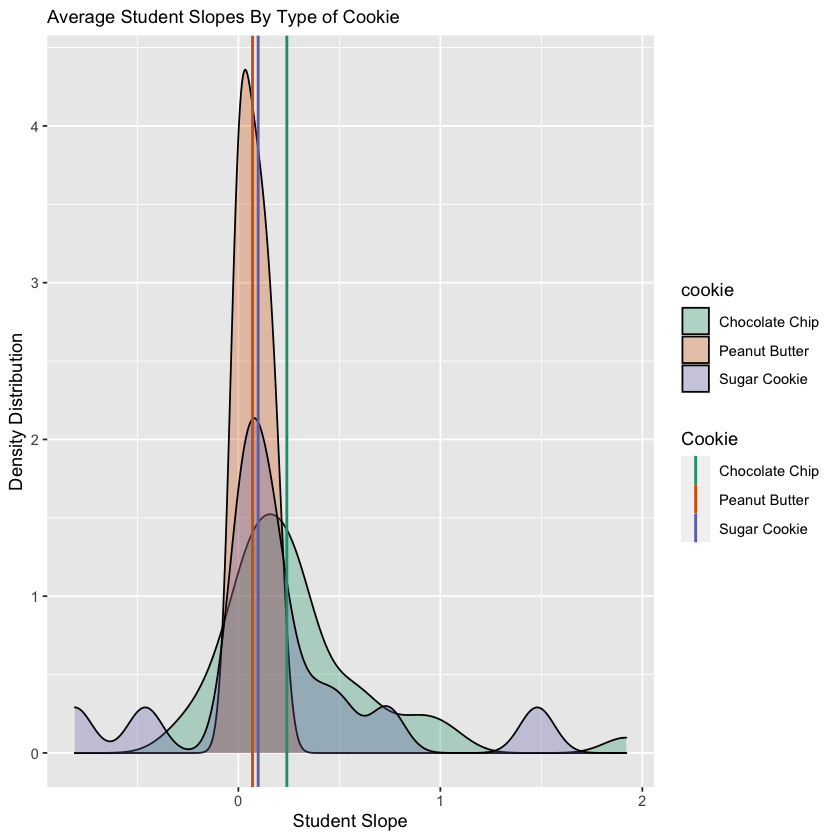

In [10]:
cookie_data%>%
  ggplot(aes(x=slope, fill=cookie)) +
  geom_density(alpha=0.3)+ 
scale_fill_brewer(palette = "Dark2") +
scale_color_brewer(palette = "Dark2") +
  labs(x= "Student Slope", y = "Density Distribution",
       subtitle="Average Student Slopes By Type of Cookie") +
geom_vline(data = mean_cookie, aes(xintercept = median, 
                                       color = Cookie), size=0.8)

In [45]:
#Median R2 by cookie type
mean_R2 <- cookie_data %>%
  group_by(Cookie) %>%
  summarize(median=median(R2))

mean_R2

Cookie,median
<chr>,<dbl>
Chocolate Chip,0.6668219
Peanut Butter,0.4752406
Sugar Cookie,0.6222690


In [49]:
#Density plot of R2 values
Rsq <- cookie_data$R2

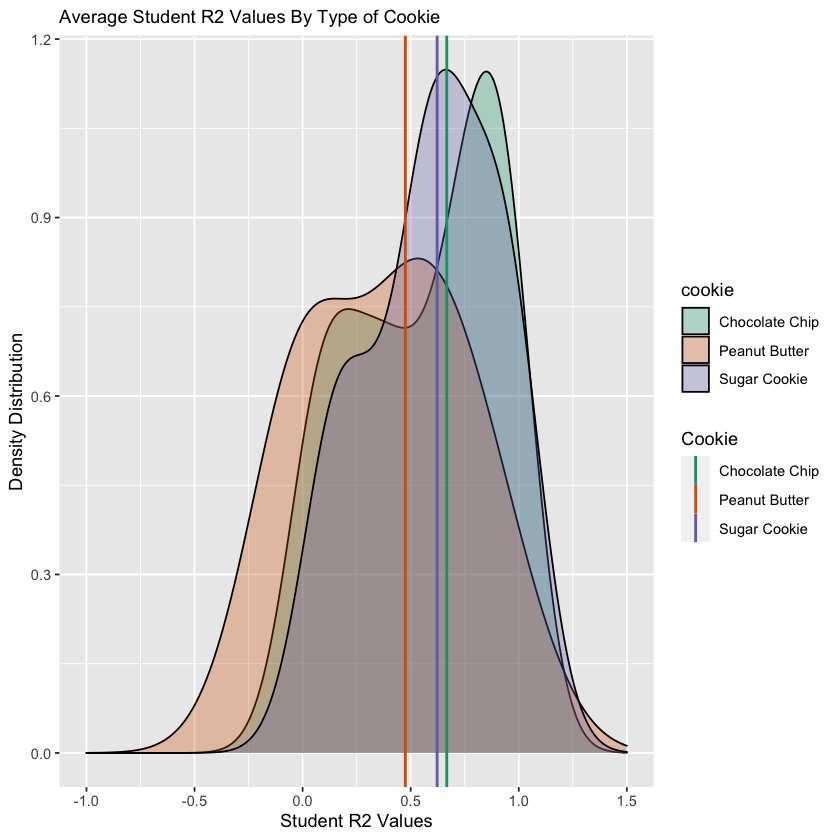

In [48]:
cookie_data%>%
  ggplot(aes(x=Rsq, fill=cookie)) +
  geom_density(alpha=0.3)+ 
scale_fill_brewer(palette = "Dark2") +
scale_color_brewer(palette = "Dark2") +
  labs(x= "Student R2 Values", y = "Density Distribution",
       subtitle="Average Student R2 Values By Type of Cookie") +
geom_vline(data = mean_R2, aes(xintercept = median, 
                                       color = Cookie), size=0.8)+
xlim(-1,1.5)

In [50]:
#Caleb's peanut butter data

In [53]:
pb_caleb <- read_excel("Cookie_data_madi.xlsx", sheet = "PB_caleb")

In [54]:
head(pb_caleb)

Temp_F,Temp_C,D1_inch,D2_inch,D1_cm,D2_cm,a,b,c,Thickness,Vol_ellipsoid,Vol_cookie,Vol_change,Temp_increase_ratio,Expected_vol,Error_percent
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
325,162.7778,2.35,2.30,5.9690,5.8420,2.9845,2.9210,1.18,2.9972,109.4479,54.72396,0.0000000,1.085324,54.72396,0.00000000
350,176.6667,2.33,2.39,5.9182,6.0706,2.9591,3.0353,1.18,2.9972,112.7627,56.38137,1.6574119,1.078616,59.39323,0.05071062
375,190.5556,2.43,2.38,6.1722,6.0452,3.0861,3.0226,1.24,3.1496,123.0650,61.53252,5.1511511,1.072886,64.06251,0.03949261
400,204.4444,2.42,2.48,6.1468,6.2992,3.0734,3.1496,1.28,3.2512,131.8277,65.91387,4.3813485,1.067935,68.73179,0.04099888
425,218.3333,2.52,2.45,6.4008,6.2230,3.2004,3.1115,1.25,3.1750,132.4361,66.21805,0.3041869,1.063613,73.40107,0.09785987
450,232.2222,2.45,2.50,6.2230,6.3500,3.1115,3.1750,1.31,3.3274,137.6915,68.84575,2.6277005,0.000000,78.07035,0.11815751


In [129]:
#Set variables
temp_c <- pb_caleb$Temp_C
actual_vol <- pb_caleb$Vol_cookie
expected_vol <- pb_caleb$Expected_vol
sd <- pb_caleb$Error_percent
type <- c("Vol_cookie", "Expected_vol")

In [176]:
lm_eqn <- function(pb_caleb){
    m <- lm(temp_c~actual_vol, pb_caleb);
    equation <- substitute(italic(y) == a + b %.% italic(x)*","~~italic(r)^2~"="~r2, 
         list(a = format(unname(coef(m)[1]), digits = 2),
              b = format(unname(coef(m)[2]), digits = 2),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(equation));
}

In [174]:
#PB Linear relationship

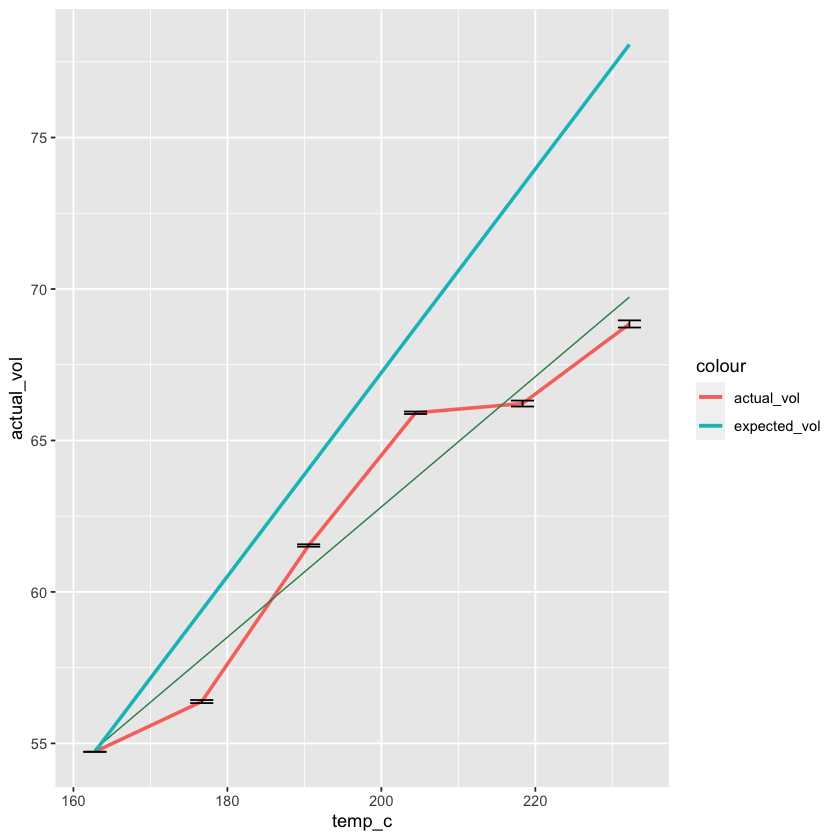

In [186]:
ggplot(pb_caleb, aes(x = temp_c)) +
geom_line(aes(y = actual_vol, 
              color = "actual_vol"), size = 1) +
geom_smooth(method = "lm", se = FALSE, aes(temp_c, actual_vol), 
            size = 0.4, color = "seagreen", formula = y~x) +
geom_line(aes(y = expected_vol, 
              color = "expected_vol"), size= 1) +
geom_errorbar(aes(ymin = actual_vol-sd, ymax = actual_vol+sd), 
              width = 3) 

In [19]:
#This portion below describes responses from a survey
#after the semester was over

In [15]:
#Load responses excel
response_data <- read_excel("Cookie_data_madi.xlsx", sheet = "Questions")

In [17]:
#Responses by % answer
response_1 <- data.frame(response_data$Response_1)
paste(prop.table(table(response_1))*100, "%", sep = "")

[1] "36.1111111111111%" "4.62962962962963%" "14.8148148148148%"
[4] "44.4444444444444%"

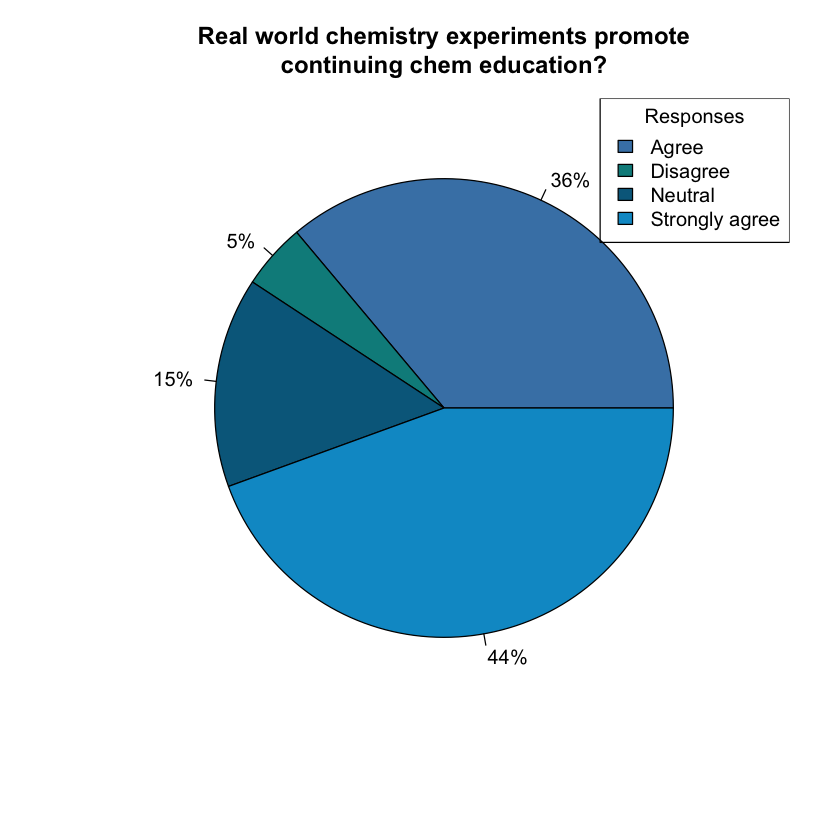

In [18]:
# Basic piechart
pie(table(response_1), 
    labels = paste(round(prop.table(table(response_1))*100),
                                      "%", sep = ""), 
    col = c("steelblue", "cyan4", "deepskyblue4", "deepskyblue3"),
    main = "Real world chemistry experiments promote
continuing chem education?")
legend("topright", 
       legend = c("Agree", "Disagree", "Neutral", "Strongly agree"), 
       fill = c("steelblue", "cyan4", "deepskyblue4", "deepskyblue3"),
       title = "Responses", cex = 1.0)